In [1]:
#### Necessary libraries ####
import numpy as np              # Numpy is the fundamental package for scientific computing in Python.
import xarray as xr
import matplotlib.pyplot as plt # Matplotlib is a scientific plotting package.
import cartopy.crs as ccrs
import cartopy
from cmocean import cm

# The statement below enforces the plots to be put into this notebook, instead of in their own windows.
%matplotlib inline

In [3]:
# Load result for each case
# Replace this sample data with averaged (and/or standard deviation of) results 
pak = xr.open_dataset('../Pakistan/2LDRM_Pakistan_case_gl.nc')
aus = xr.open_dataset('../Australia/2LDRM_Australia_case_gl.nc')
sct = xr.open_dataset('../Scotland/2LDRM_Scotland_case_gl.nc')

pakm = pak.sum(dim='time').moisture_source.T
ausm = aus.sum(dim='time').moisture_source.T
sctm = sct.sum(dim='time').moisture_source.T

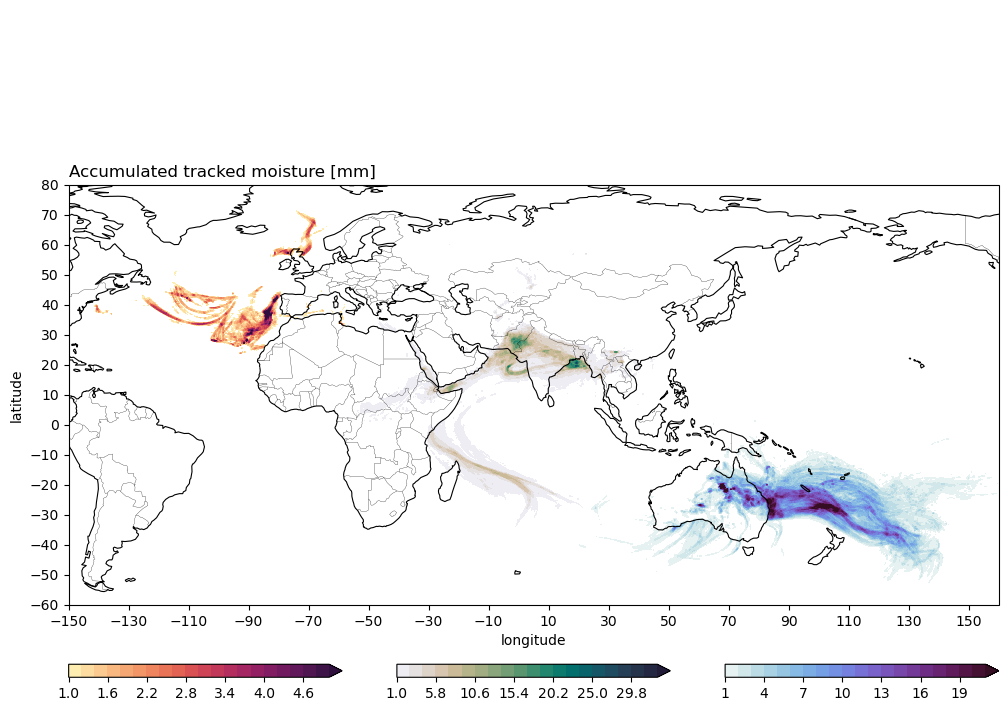

In [56]:
prj = ccrs.PlateCarree()
prj7 = ccrs.PlateCarree(central_longitude=70)

fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'projection':prj7})

ax1 = fig.add_subplot(131)
ax1.set_axis_off()
ax2 = fig.add_subplot(132)
ax2.set_axis_off()
ax3 = fig.add_subplot(133)
ax3.set_axis_off()

ax.add_feature(cartopy.feature.COASTLINE, linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', linewidth=.2)

p1 = pakm.plot.contourf(ax=ax,levels=np.linspace(1,33,21), extend='max',
                   cmap = cm.rain,
                   transform=prj,
                   add_colorbar=False, 
                  )
p2 = ausm.plot.contourf(ax=ax,levels=np.linspace(1,21,21), extend='max',
                   cmap = cm.dense,
                   transform=prj,
                   add_colorbar=False, 
                  )
p3 = sctm.plot.contourf(ax=ax,levels=np.linspace(1,5,21), extend='max',
                   cmap = cm.matter,
                   transform=prj,
                   add_colorbar=False, 
                  )

ax.set_xticks(np.arange(-180, 180, 20), crs=prj)
ax.set_yticks(np.arange(-90, 91, 10), crs=prj)
ax.set_extent([-80,230,-60,80], crs=prj)

ax.set_title("Accumulated tracked moisture [mm]", loc="left")

fig.colorbar(p1, ax=ax2,  pad=0.01, orientation='horizontal')
fig.colorbar(p2, ax=ax3,  pad=0.01, orientation='horizontal')
fig.colorbar(p3, ax=ax1,  pad=0.01, orientation='horizontal')

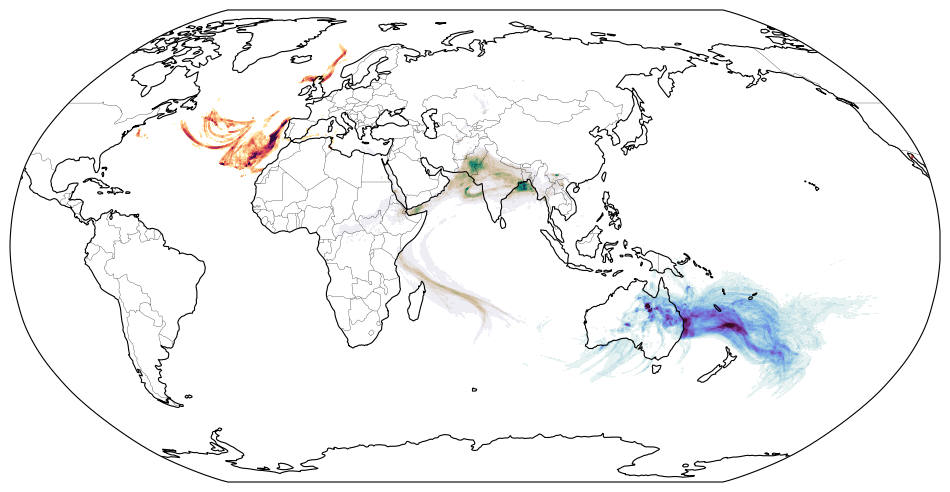

In [57]:
# Robinson Projection
prjr = ccrs.Robinson(central_longitude=70)
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'projection':prjr})

ax.add_feature(cartopy.feature.COASTLINE, linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', linewidth=.2)

pakm.plot.contourf(levels=np.linspace(1,30,21), extend='max',
                   cmap = cm.rain,
                   transform=prj,
                   add_colorbar=False,
                  )
ausm.plot.contourf(levels=np.linspace(1,25,21), extend='max',
                   cmap = cm.dense,
                   transform=prj,
                   add_colorbar=False,
                  )
sctm.plot.contourf(levels=np.linspace(1,5,21), extend='max',
                   cmap = cm.matter,
                   transform=prj,
                   add_colorbar=False, 
                  )

# ax.set_extent([-80,180,-60,70], crs=prj)